In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_ds = image_dataset_from_directory('training_set/training_set', validation_split=0.2, subset='training', seed=6743, batch_size=64, image_size=(224,224), label_mode='categorical')
val_ds = image_dataset_from_directory('training_set/training_set', validation_split=0.2, subset='validation', seed=6743, batch_size=64, image_size=(224,224), label_mode='categorical')
test_ds = image_dataset_from_directory('test_set/test_set', batch_size=100, image_size=(224,224), label_mode='categorical')

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


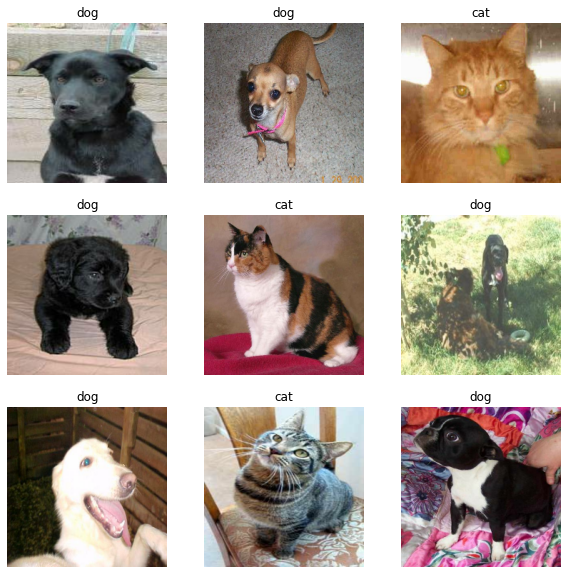

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i][0] == 1:
            plt.title('cat')
        else:
            plt.title('dog')
        plt.axis("off")

plt.show()

In [4]:
model = VGG16()
new_model = Sequential()
for layer in model.layers[:-1]:
    new_model.add(layer)
for layer in new_model.layers:
    layer.trainable = False
new_model.add(Dense(2, activation='softmax'))
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
new_model.compile(optimizer= Adam(0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


In [ ]:
for images, labels in test_ds.take(1):
    cm = confusion_matrix(np.argmax(labels, axis=-1), np.argmax(new_model.predict(images), axis=-1))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['cat', 'dog'])
cm_plot.plot()